In [1]:
import cv2
import numpy as np
import plantcv as pcv
from matplotlib import pyplot as plt
from imutils import perspective
from scipy.spatial import distance as dist

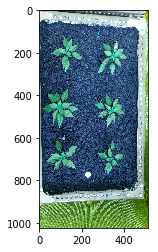

In [2]:
image = cv2.imread('data/coin10_2.jpg')
image = cv2.resize(image,(512,1024))
plt.imshow(image)

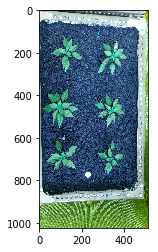

In [3]:
img_whitebalance = pcv.white_balance(image)
plt.imshow(img_whitebalance)

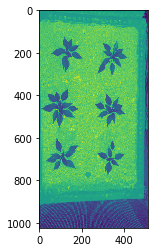

In [4]:
lab = cv2.cvtColor(img_whitebalance, cv2.COLOR_BGR2Lab)
# split image
l,green, blue = cv2.split(lab)

plt.imshow(green)

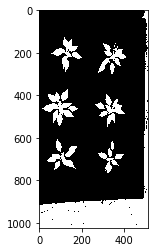

In [5]:
ret, image_binary = cv2.threshold(green, 110, 255, cv2.THRESH_BINARY_INV)
plt.imshow(image_binary, cmap='gray')

In [6]:
mask = np.copy(image_binary)

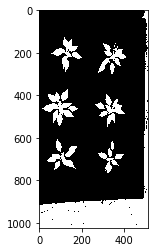

In [7]:
fill_image = pcv.fill(image_binary,1)
plt.imshow(fill_image, cmap='gray')

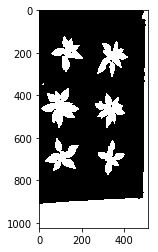

In [8]:
kernel2 = np.ones((7,7), np.uint8)
dilated = cv2.dilate(fill_image, kernel=kernel2)
plt.imshow(dilated, cmap='gray')

In [9]:
mask1 = np.copy(dilated)
ori_img = np.copy(image)
object_id, obj_hierarchy = cv2.findContours(dilated, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]

for i, cnt in enumerate(object_id):
    print(i)
    cv2.drawContours(ori_img, object_id, i, (255, 102, 255), -1, lineType=8, hierarchy=obj_hierarchy)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


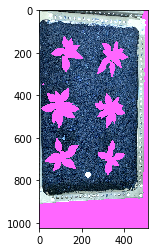

In [10]:
plt.imshow(ori_img)

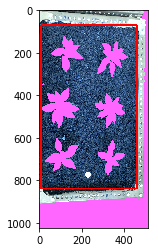

In [11]:
# pcv.params.debug = "print"

roi, roi_hierarchy = pcv.roi.rectangle(x=10,y=70, h=770, w=450, img=ori_img)

ref_img =np.copy(ori_img)
cv2.drawContours(ref_img, roi, -1, (255, 0, 0), 5)
plt.imshow(ref_img)

In [12]:
roi_object, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(ori_img, 'partial', roi, roi_hierarchy,object_id, obj_hierarchy)

In [13]:
len(roi_object)

17

In [14]:
k ,clusters_i, contours_plant = pcv.cluster_contours(ori_img, roi_object, 4,6)

In [15]:
len(clusters_i)

17

20


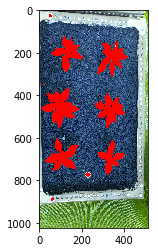

In [16]:

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v  = cv2.split(hsv)

_, contours_coin, hierarchy = cv2.findContours(s, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours_coin:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 150 )):
        contour_list.append(contour)
for contour in clusters_i:
    contour_list.append(contour)
print(len(contour_list))
objects_detected = image.copy()
objects_detected = cv2.drawContours(objects_detected, contour_list, -1, (255,0,0),-1)
plt.imshow(objects_detected)


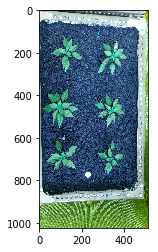

In [17]:
count1 = contour_list[0]
img_cnt = image.copy()
plt.imshow(cv2.drawContours(img_cnt, count1, 7, (255,0,0),-1))


In [18]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0])* 0.5, (ptA[1]+ptB[1])* 0.5)



0.7813636363636364 0.955 0
1.2895495902295333 1.2851583756953204 1
0.9898795736087971 0.8528533173950462 2
7.051539264000133 7.790692323546431 3
0.26045454545454544 0.3472727272727273 4
9.415871102330495 9.221750278687844 5
0.41181479529010945 0.8236295905802189 6
0.17363636363636364 0.17363636363636364 7
8.325327229379015 8.542055424365607 8
0.3038636363636364 0.3906818181818182 9
0.46753021734667743 0.9609011890102553 10
10.318816626697716 9.867192877093279 11
0.3038636363636364 0.3038636363636364 12
0.26045454545454544 0.26045454545454544 13
0.3472727272727273 0.3930860366782379 14
0.49111780075138395 0.5525075258453069 15
10.405513130662836 7.973105023703643 16
0.6752869760331529 0.368338350563538 17
8.528643646462614 8.221755159507765 18
0.43409090909090914 0.47946908051881065 19


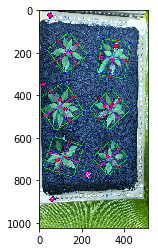

In [19]:
pixelsPerMetric = None
orig = image.copy()
for n,c in enumerate(contour_list):
    
    #bounding box of the contour
    box = cv2.minAreaRect(c) 
    #vertices of the box
    box = cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    #sort contour
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
    
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
        (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
        (255, 0, 255), 2)
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    if pixelsPerMetric is None:
        pixelsPerMetric = dB / 0.955
    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric
    print( dimA, dimB, n)
    
    plt.imshow(orig)